# Imports

In [1]:
import pandas as pd
import numpy as np

import lib.draw as draw
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor, NearestNeighbors
from sklearn.neural_network import MLPClassifier
import pickle

# Loading data

In [2]:
df = pd.read_csv('data/formated_data.csv').drop('Unnamed: 0', axis = 1)
df

,type,player,team,success,x,y,endX,endY,isShot,isGoal,...,xdribble,ydribble,toFoul,toCorner,r,a,rebound_r,rebound_a,dribble_r,dribble_a
0,Pass,322852,2187,1,0.501,0.519,0.373,0.572,False,False,...,0.501,0.519,False,False,0.138539,0.937521,0.000000,0.500000,0.0,0.5
1,Pass,83556,2187,1,0.372,0.573,0.319,0.790,False,False,...,0.372,0.573,False,False,0.223379,0.788126,0.000000,0.500000,0.0,0.5
2,Pass,137387,2187,1,0.333,0.766,0.243,0.597,False,False,...,0.333,0.766,False,False,0.191471,0.172119,0.000000,0.500000,0.0,0.5
3,Pass,322847,2187,1,0.253,0.678,0.280,0.321,False,False,...,0.253,0.678,False,False,0.358020,0.262014,0.000000,0.500000,0.0,0.5
4,Pass,322849,2187,0,0.365,0.114,0.886,0.000,False,False,...,0.365,0.114,False,False,0.533326,0.465716,0.000000,0.500000,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243770,Pass,90310,297,1,0.686,0.210,0.663,0.374,False,False,...,0.686,0.210,False,False,0.165605,0.772176,0.000000,0.500000,0.0,0.5
243771,Pass,94891,297,1,0.652,0.458,0.680,0.875,False,False,...,0.652,0.458,False,False,0.417939,0.739329,0.000000,0.500000,0.0,0.5
243772,Pass,125793,297,0,0.692,0.947,0.961,0.555,False,False,...,0.692,0.947,False,False,0.475421,0.345719,0.611485,0.144929,0.0,0.5
243773,Pass,32381,108,0,0.150,0.484,0.727,0.603,False,False,...,0.150,0.484,False,False,0.589143,0.532370,0.479416,0.471969,0.0,0.5


# Calculating player strong/weak foot
(Not used currently)

In [3]:
temp_df = df.groupby('player').mean()[['rightFoot','leftFoot']]
temp_df['strongFoot'] = 'rightFoot'
temp_df['strongFoot'].loc[temp_df.leftFoot > temp_df.rightFoot] = 'leftFoot'
df = df.merge(temp_df['strongFoot'], on = 'player')
temp_df

,rightFoot,leftFoot,strongFoot
player,,,
2776,0.000000,0.000000,rightFoot
6503,0.020561,0.001869,rightFoot
9346,0.013333,0.013333,rightFoot
10603,0.011962,0.002392,rightFoot
11451,0.002755,0.002755,rightFoot
...,...,...,...
335707,0.000000,0.080000,leftFoot
336288,0.000000,0.000000,rightFoot
337916,0.047619,0.095238,leftFoot


# Filtering data

In [4]:
# Remove non-shot events
df = df[df.isShot]
df

,type,player,team,success,x,y,endX,endY,isShot,isGoal,...,ydribble,toFoul,toCorner,r,a,rebound_r,rebound_a,dribble_r,dribble_a,strongFoot
1,SavedShot,322852,2187,1,0.725,0.460,0.725,0.460,True,False,...,0.460,False,False,0.0,0.5,0.0,0.5,0.0,0.5,rightFoot
2,SavedShot,322852,2187,1,0.910,0.503,0.910,0.503,True,False,...,0.503,False,False,0.0,0.5,0.0,0.5,0.0,0.5,rightFoot
4,Goal,322852,2187,1,0.885,0.548,0.885,0.548,True,True,...,0.548,False,False,0.0,0.5,0.0,0.5,0.0,0.5,rightFoot
42,SavedShot,322852,2187,1,0.902,0.582,0.902,0.582,True,False,...,0.582,False,False,0.0,0.5,0.0,0.5,0.0,0.5,rightFoot
76,MissedShots,322852,2187,1,0.892,0.597,0.892,0.597,True,False,...,0.597,False,False,0.0,0.5,0.0,0.5,0.0,0.5,rightFoot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243569,SavedShot,109473,292,1,0.856,0.380,0.856,0.380,True,False,...,0.380,False,False,0.0,0.5,0.0,0.5,0.0,0.5,rightFoot
243584,SavedShot,109473,292,1,0.701,0.578,0.701,0.578,True,False,...,0.578,False,False,0.0,0.5,0.0,0.5,0.0,0.5,rightFoot
243592,SavedShot,337916,288,1,0.776,0.318,0.776,0.318,True,False,...,0.318,False,False,0.0,0.5,0.0,0.5,0.0,0.5,leftFoot
243594,Goal,337916,288,1,0.933,0.361,0.933,0.361,True,True,...,0.361,False,False,0.0,0.5,0.0,0.5,0.0,0.5,leftFoot


# Gradient functions

In [5]:
# Function to visualize the gradient
def plot_xgmap(xgmap):
    draw.pitch()
    xgmap.x *= 100
    xgmap.y *= 100
    cmap = np.zeros((len(xgmap),4))
    cmap[:,0] = 1; cmap[:,1] = 1; cmap[:,2] = 1; cmap[:,3] = xgmap.xg
    plt.scatter(xgmap.x, xgmap.y, s = 15, c = cmap, marker = 's', linewidth=0, zorder = 10);

In [6]:
# DEPRECATED
# Create the xgmap using KNN
def calculate_xgmap_via_knn(shot_data, k=30):
    data = shot_data[['x', 'y', 'isGoal']]

    nn = NearestNeighbors(n_neighbors=k, n_jobs = -1)
    nn.fit(data[['x','y']], data['isGoal'])

    xgmap = [[i,j] for i in range(50,100) for j in np.arange(0, 100, 1.5)]
    xgmap = pd.DataFrame(xgmap, columns=['x','y'])

    estimated_xg = []
    for i, pixel in xgmap.iterrows():
        neighbors_dist, neighbors_ind = nn.kneighbors(pixel[['x','y']].to_numpy().reshape(1, -1))
        counter = 0
        sumer = 0
        for n_dist, n_ind in zip(neighbors_dist[0], neighbors_ind[0]):
            if n_dist > 10:
                continue
            counter += 1
            sumer += data.iloc[n_ind]['isGoal']
        # Avoid div by 0
        if counter == 0:
            counter += 1

        estimated_xg.append(sumer / counter)

    xgmap['xg'] = estimated_xg

    return xgmap

In [7]:
# Create the xgmap using Neural Networks
def calculate_xgmap_via_nn(shot_data):
    data = shot_data[['x', 'y', 'isGoal']]

    nn = MLPClassifier(hidden_layer_sizes=(30,30), activation = 'relu', learning_rate_init=0.001, max_iter=5000)
    nn.fit(data[['x','y']], data['isGoal'])

    xgmap = [[i/100,j/100] for i in range(0,100) for j in np.arange(0, 100, 1.5)]
    xgmap = pd.DataFrame(xgmap, columns=['x','y'])

    xgmap['xg'] = nn.predict_proba(xgmap[['x','y']])[:,1]

    return xgmap, nn

# Full Map

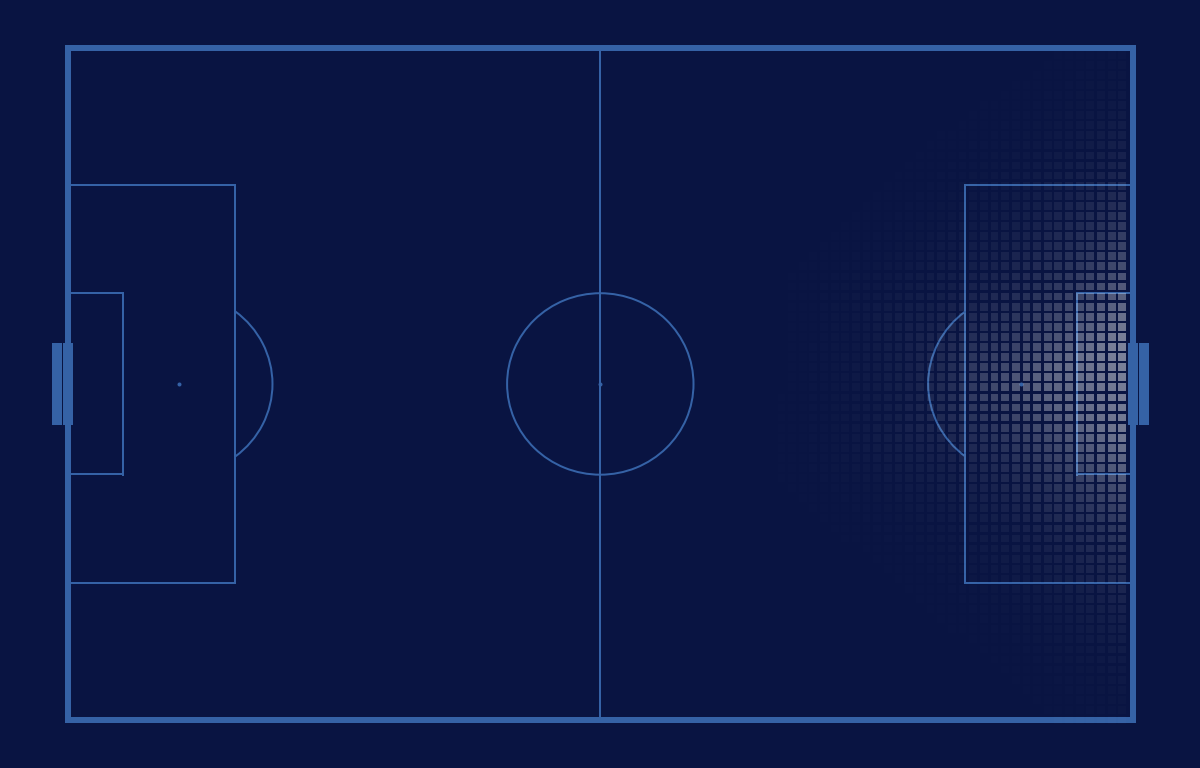

In [8]:
xgmap, nn = calculate_xgmap_via_nn(df)
plot_xgmap(xgmap)
plt.savefig('presentation/xgoalsmap.png')

# Save model for use in simulator

In [9]:
pickle.dump(nn, open('matrix/shot_gradient.sav', 'wb'))